# Quickstart: science data

load a single quadrant Science image and get the full focal plane !

This tutorial makes use of `ztfquery` for the data I/O. 

***
## Load data

let's say you want the file `ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits`. Given the name, it is an observation of field 655, taken the 24th of September 2020 with the **ztf:r** filter. `ztfquery` knows how to fetch the filepath from your computer given its name, and, if it does not exists, will download it for you. Do enable that, set the `as_path=False` option of the `from_filename()` method.

In [1]:
import ztfimg

In [2]:
img = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits",
                                   as_path=False)

Note on `as_path`: **as_path=True** means *I gave you the exact filepath location* ; **as_path=False** means: *ztfquery, this is the filename, look for it and download it if necessary*. Remark that, if you indeed provided the fulpath but set as_path=False, this will work as long as the fullpath is where the file should be given the ztf data environment.

***
## Data

The `get_data()` method enables you to access the data either as stored in the first file, or corrected for background or mask.

**orientation** the `get_data()` method has a `reorder` option that is true by default. It set `+Dec upward`  `+RA rightward`. `self.data` are the data as stored. You can always set `reorder=False`.

In [3]:
data_as_stored = img.get_data()
data_as_stored # but reordered, self.data is exactly as stored

array([[ 44.91321 , 167.88715 , 206.81393 , ..., 185.91528 , 196.35838 ,
        194.94452 ],
       [ 16.670918,  78.78005 , 138.10672 , ..., 152.68452 , 149.92209 ,
        158.07927 ],
       [ 17.609827,  87.123825, 152.8368  , ..., 148.68439 , 154.78484 ,
        167.03732 ],
       ...,
       [ 16.900919,  76.01857 , 139.25365 , ..., 165.22946 , 159.50085 ,
        154.41986 ],
       [ 10.205329,  83.728935, 134.86244 , ..., 161.0656  , 147.19606 ,
        155.4496  ],
       [ 12.984478,  83.76391 , 133.77336 , ..., 160.41643 , 157.65231 ,
        156.70863 ]], dtype=float32)

remove the background (see `get_background()`)

In [4]:
data_no_back = img.get_data(rm_bkgd=True)
data_no_back

array([[-1.1280832e+02,  1.0165619e+01,  4.9092407e+01, ...,
         2.8193756e+01,  3.8636856e+01,  3.7222992e+01],
       [-1.4105061e+02, -7.8941475e+01, -1.9614807e+01, ...,
        -5.0370026e+00, -7.7994385e+00,  3.5774231e-01],
       [-1.4011169e+02, -7.0597702e+01, -4.8847198e+00, ...,
        -9.0371399e+00, -2.9366913e+00,  9.3157959e+00],
       ...,
       [-1.4082060e+02, -8.1702957e+01, -1.8467880e+01, ...,
         7.5079346e+00,  1.7793274e+00, -3.3016663e+00],
       [-1.4751620e+02, -7.3992592e+01, -2.2859085e+01, ...,
         3.3440704e+00, -1.0525467e+01, -2.2719269e+00],
       [-1.4473705e+02, -7.3957619e+01, -2.3948166e+01, ...,
         2.6949005e+00, -6.9213867e-02, -1.0128937e+00]], dtype=float32)

and mask back pixels (see `get_mask()`)

In [5]:
data_clean = img.get_data(apply_mask=True, rm_bkgd=True)
data_clean

array([[-1.1280832e+02,  1.0165619e+01,  4.9092407e+01, ...,
         2.8193756e+01,  3.8636856e+01,  3.7222992e+01],
       [-1.4105061e+02, -7.8941475e+01, -1.9614807e+01, ...,
        -5.0370026e+00, -7.7994385e+00,  3.5774231e-01],
       [-1.4011169e+02, -7.0597702e+01, -4.8847198e+00, ...,
        -9.0371399e+00, -2.9366913e+00,  9.3157959e+00],
       ...,
       [-1.4082060e+02, -8.1702957e+01, -1.8467880e+01, ...,
         7.5079346e+00,  1.7793274e+00, -3.3016663e+00],
       [-1.4751620e+02, -7.3992592e+01, -2.2859085e+01, ...,
         3.3440704e+00, -1.0525467e+01, -2.2719269e+00],
       [-1.4473705e+02, -7.3957619e+01, -2.3948166e+01, ...,
         2.6949005e+00, -6.9213867e-02, -1.0128937e+00]], dtype=float32)

***
## Plotting

The `show()` method display the image. By default it show the data as stored, but you can directly provide the data you want to show.

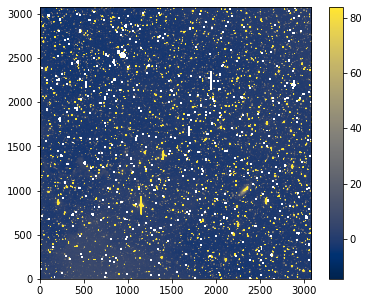

In [6]:
fig = img.show(data=data_clean)

 See data stored and not re-ordered

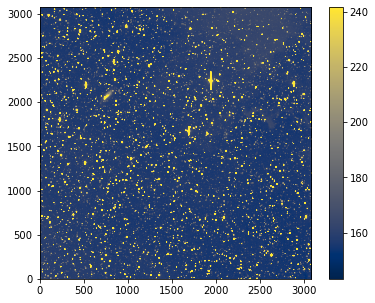

In [7]:
fig = img.show(data=img.data)

***
## RA, Dec <-> x,y 

This data contains UGC 2885 (58.2599, 35.5903). Let's use the `radec_to_xy()` method to convert ra, dec (deg) coordinates into x, y data positions. 

**orientation** the covertion method  (xy_to_radec or radec_to_xy) also have the `reorder=True` by default. If you are considering data not reordered (e.g. using self.data directly) set `reorder=False`

In [8]:
x, y = img.radec_to_xy(58.2599, 35.5903) # radec_to_xy accepts (and returns) array
x, y # used the default reorder=True 

(array([2309.44231913]), array([1007.07609495]))

let's now do a cutout 100x100 around this location on the cleaned science image.

*careful* in numpy x and y are inverted as numpy is matrix (not plot) oriented

In [9]:
data_clean = img.get_data(apply_mask=True, rm_bkgd=True) # used the default reorder=True 

In [10]:
cutout = data_clean[int(y[0]-100):int(y[0]+100), 
                    int(x[0]-100):int(x[0]+100)]

Show it with a usual matplotlib plot

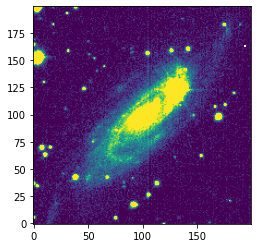

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(cutout, origin="lower", vmax=80, vmin=0)

or simply use the `show()` method

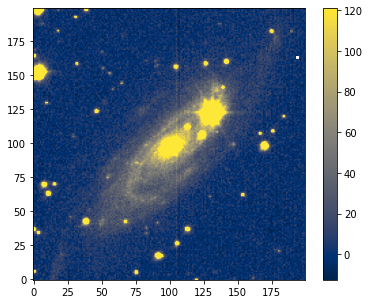

In [12]:
# vmax or vmin as string means 'percent of data'
fig = img.show(data=cutout, vmax="98") 